In [10]:
import torch
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [11]:
n_dim = 2
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim, centers=[[1, 1], [-1,-1], [1, -1], [-1, 1]], shuffle=True, cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=30, n_features=n_dim, centers=[[1, 1], [-1,-1], [1, -1], [-1, 1]], shuffle=True, cluster_std=0.3)

In [12]:
def label_map(y_, from_, to_):
    y = np.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

y_train = label_map(y_train, (0, 1), 0)
y_train = label_map(y_train, (2, 3), 1)
y_test = label_map(y_test, (0, 1), 0)
y_test = label_map(y_test, (2, 3), 1)

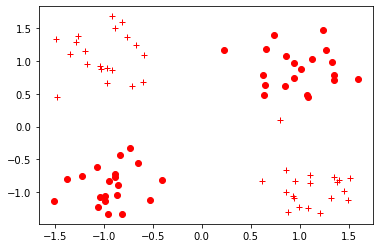

In [16]:
def vis_data(x, y = None, c = 'r'):
    if y is None:
        y = [None] * len(x)
    for x_, y_ in zip(x, y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*', markerfacecolor='none', markeredgecolor=c)
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')

plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

In [17]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [18]:
class NeuralNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        
        self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()
    
    def forward(self, input_tensor):
        linear1 = self.linear_1(input_tensor)
        relu = self.relu(linear1)
        linear2 = self.linear_2(relu)
        output = self.sigmoid(linear2)
        return output

In [19]:
model = NeuralNet(2, 5)
learning_rate = 0.03
criterion = torch.nn.BCELoss()
epochs = 2000
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [23]:
model.eval()
test_loss_before = criterion(model(x_test).squeeze(), y_test)
print(model(x_test).shape)
print(f"Before Training, test loss is {test_loss_before.item()}")

torch.Size([30, 1])
Before Training, test loss is 0.6875680088996887


In [26]:
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    train_output = model(x_train)
    loss = criterion(train_output.squeeze(), y_train)
    if epoch % 100 == 0:
        print(f"Train loss at {epoch} is {loss.item()}")
    
    loss.backward()
    optimizer.step()

Train loss at 0 is 0.7026106119155884
Train loss at 100 is 0.6502019762992859
Train loss at 200 is 0.6010618209838867
Train loss at 300 is 0.539117693901062
Train loss at 400 is 0.4661683142185211
Train loss at 500 is 0.3926517367362976
Train loss at 600 is 0.3273962736129761
Train loss at 700 is 0.27359992265701294
Train loss at 800 is 0.23090782761573792
Train loss at 900 is 0.1975284367799759
Train loss at 1000 is 0.17149882018566132
Train loss at 1100 is 0.1510418802499771
Train loss at 1200 is 0.13477212190628052
Train loss at 1300 is 0.12166639417409897
Train loss at 1400 is 0.11095176637172699
Train loss at 1500 is 0.10205866396427155
Train loss at 1600 is 0.09458605945110321
Train loss at 1700 is 0.08822625130414963
Train loss at 1800 is 0.08274848014116287
Train loss at 1900 is 0.07799090445041656


In [30]:
torch.save(model.state_dict(), 'model.pt')
print(f"state_dict format of the model: {model.state_dict()}")

new_model = NeuralNet(2, 5)
new_model.load_state_dict(torch.load("model.pt"))
# new_model.eval()
print(new_model(torch.FloatTensor([-1, 1])).item())

state_dict format of the model: OrderedDict([('linear_1.weight', tensor([[ 1.7793,  1.8253],
        [-0.3615, -0.1712],
        [-1.9015, -1.9856],
        [-0.4744, -0.7079],
        [ 0.0395, -0.3005]])), ('linear_1.bias', tensor([-0.6300,  1.4766, -0.2545,  0.4858, -0.6278])), ('linear_2.weight', tensor([[-2.6362,  1.4281, -2.7192,  0.0181,  0.2938]])), ('linear_2.bias', tensor([1.6161]))])
0.9820325970649719
